# 1. Popularity Based Recommendation System

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os 
os.chdir('/content/drive/My Drive/Residency5')

## About the Dataset (jokes.csv)



 
1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").
  
2. One row per user
3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.



### Q1. Read the data (jokes.csv)

In [4]:
import pandas as pd
import numpy as npb
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
!pip install surprise

     |████████████████████████████████| 11.8MB 5.1MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1670917 sha256=a9b6276ffe48e0727eae99e1ad5d26dca6c29618fdb2b5a57db0e2000c789839
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [6]:
dfjokes = pd.read_csv("Dataset - jokes.csv") 

In [7]:
dfjokes.shape

(24983, 101)

In [8]:
dfjokes.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,Joke11,Joke12,Joke13,Joke14,Joke15,Joke16,Joke17,Joke18,Joke19,Joke20,Joke21,Joke22,Joke23,Joke24,Joke25,Joke26,Joke27,Joke28,Joke29,Joke30,Joke31,Joke32,Joke33,Joke34,Joke35,Joke36,Joke37,Joke38,Joke39,...,Joke61,Joke62,Joke63,Joke64,Joke65,Joke66,Joke67,Joke68,Joke69,Joke70,Joke71,Joke72,Joke73,Joke74,Joke75,Joke76,Joke77,Joke78,Joke79,Joke80,Joke81,Joke82,Joke83,Joke84,Joke85,Joke86,Joke87,Joke88,Joke89,Joke90,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,99.0,99.00,99.0,99.00,99.00,99.00,99.00,-9.42,99.00,99.00,99.00,-7.72,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.0,2.77,8.3,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,99.00,8.25,99.00,99.00,7.48,7.28,7.28,8.93,99.00,6.17,7.28,99.00,99.00,8.98,7.33,99.00,6.17,9.08,...,6.46,7.28,99.00,99.00,7.04,7.28,99.00,7.28,8.25,99.00,99.0,99.00,99.0,99.00,99.00,8.93,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,9.03,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,99.00,99.00,99.00,99.00,2.91,3.93,6.75,6.60,99.00,6.65,-6.12,99.00,7.57,6.21,6.65,99.00,-8.30,7.18,...,0.00,-3.69,99.00,99.00,7.82,0.24,99.00,7.28,-2.33,99.00,99.0,99.00,99.0,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,0.63,99.00,99.00,-2.33,99.00,99.00,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,99.0,99.00,99.0,99.00,99.00,99.00,4.13,99.00,99.00,99.00,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


### Q2. Create new Dataframe `ratings` starting from column `joke1` and consider first 200 rows only



In [9]:
dfRatings = dfjokes.loc[:199, 'Joke1':]

In [10]:
dfRatings.shape

(200, 100)

In [11]:
dfRatings.dtypes

Joke1      float64
Joke2      float64
Joke3      float64
Joke4      float64
Joke5      float64
            ...   
Joke96     float64
Joke97     float64
Joke98     float64
Joke99     float64
Joke100    float64
Length: 100, dtype: object

### Q3. Preprocess `ratings`


*   Verify presence of null values
*   Replace null with 0



In [12]:
dfRatings.isna().sum().sum() #Check null values

0

In [13]:
# null values are represented by 99 value so replace it with 0 value qwhihc will represent
# no rating by user
dfRatings.replace(99,0,inplace=True)          

### Q4. Find mean for each joke


*   Find mean of 100 jokes



In [14]:
meanratings = dfRatings.mean(axis=0)

In [16]:
meanratings.sort_values(ascending=False)[0:10]      #using series

Joke50    4.05540
Joke36    3.61150
Joke53    3.57150
Joke35    3.22315
Joke29    3.18995
Joke27    3.05240
Joke62    2.86185
Joke49    2.85000
Joke32    2.77955
Joke31    2.65710
dtype: float64

In [17]:
dfmeanratings = pd.DataFrame({'MeanRating': meanratings})      #using daraframe

### Q5. List most popular 10 jokes

In [18]:
dfmeanratings.sort_values(by='MeanRating',axis=0,ascending=False).head(10)

,MeanRating
Joke50,4.05540
Joke36,3.61150
Joke53,3.57150
Joke35,3.22315
Joke29,3.18995
Joke27,3.05240
Joke62,2.86185
Joke49,2.85000
Joke32,2.77955
Joke31,2.65710


#2. Collaborative Filtering based Recommendation System

## About the Dataset

This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. Explicit ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation) and implicit rating is expressed by 0.

Reference: http://www2.informatik.uni-freiburg.de/~cziegler/BX/

#### Execute below cells to read the datasets

In [19]:
books = pd.read_csv("Dataset -books.csv", sep=";", error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

users = pd.read_csv("Dataset- users.csv", sep=";", error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

ratings = pd.read_csv("Dataset - ratings.csv", sep=";", error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:27

# Q1. Explore the Dataset

1.   Check shape of all the datasets
2.   Print Columns in all the datasets
3.   Remove last 3 columns of `books` ('imageUrlS', 'imageUrlM', 'imageUrlL')and verify



In [23]:
# 1) Check shape Books of datasets
print("Shape of Books dataset - " + str(books.shape))

Shape of Users dataset - (271360, 8)


Note: Somehow my file "Dataset-books.csv" is unable to get loaded completly on Colab drive. Some 20 records are missing...tried to upload multiple times.

In [28]:
# 1) Check shape users of datasets
print("Shape of users dataset - " + str(users.shape))

Shape of users dataset - (278858, 3)


In [29]:
# 1) Check shape of ratings  datasets
print("Shape of Ratings dataset - " + str(ratings.shape))

Shape of Ratings dataset - (1149780, 3)


In [30]:
# 2) print Columns in all dataset
books.columns

Index(['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher',
       'imageUrlS', 'imageUrlM', 'imageUrlL'],
      dtype='object')

In [32]:
users.columns

Index(['userID', 'Location', 'Age'], dtype='object')

In [33]:
ratings.columns

Index(['userID', 'ISBN', 'bookRating'], dtype='object')

In [34]:
#3) Remove last 3 columns of books ('imageUrlS', 'imageUrlM', 'imageUrlL')and verify
books.drop(columns=['imageUrlS', 'imageUrlM', 'imageUrlL'], axis=0,inplace=True)

In [35]:
books.columns

Index(['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher'], dtype='object')

# Q2. Data Preprocessing

### Create new DataFrame `ratings_new` with:
1.   Books from `ratings` Dataset, which exists in `books` Dataset (Intersect on ISBN)
2.   Ratings from `ratings` Dataset, which exists in `users` Dataset (Intersect on userID)


In [48]:
ratings_new = pd.merge(ratings, books, on='ISBN')  
ratings_new = pd.merge(ratings_new, users, on='userID')  
ratings_new.shape


(1031136, 9)

# Q3. Data Preprocessing

### In new Dataframe, drop rows with 0 `bookRating`, since 0 is mentioned as 'Implicit Rating'.
#### (Check shape of new Dataframe before and after dropping 0s)


In [49]:
ratings_new.shape

(1031136, 9)

In [50]:
ratings_new[ratings_new['bookRating']== 0].shape

(647294, 9)

In [51]:
ratings_new.shape[0] - ratings_new[ratings_new['bookRating'] == 0].shape[0]

383842

In [52]:
# Drop book ratings having value = 0 
ratings_new = ratings_new[ratings_new['bookRating'] != 0]
ratings_new.shape


(383842, 9)

In [53]:
ratings_new.head()

,userID,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher,Location,Age
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"cincinnati, ohio, usa",23.0
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,"cincinnati, ohio, usa",23.0
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,"cincinnati, ohio, usa",23.0
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,"cincinnati, ohio, usa",23.0
5,2313,0385482388,5,The Mistress of Spices,Chitra Banerjee Divakaruni,1998,Anchor Books/Doubleday,"cincinnati, ohio, usa",23.0


# Q4. Check rating's distribution
### Plot a visual to identify highest occuring rating 

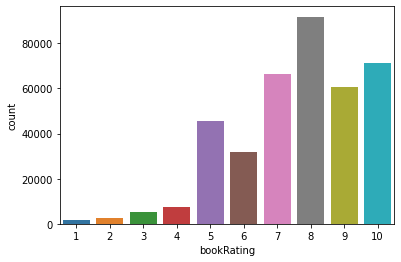

In [54]:
sns.countplot(data=ratings_new, x='bookRating')

From plot it is evident that most of tha ratings are 5 and above

# Q5. Build a User-Based Collaborative Filtering model



1.   Consider users who have rated atleast 100 books
2.   Transform data to surprise format
3.   Assure that only user, book and rating columns are present in the new dataset in surprise format



In [74]:
counts = ratings_new['userID'].value_counts()
ratings_final = ratings_new[ratings_new['userID'].isin(counts[counts >= 100].index)]

In [81]:
ratings_final.columns

Index(['userID', 'ISBN', 'bookRating', 'bookTitle', 'bookAuthor',
       'yearOfPublication', 'publisher', 'Location', 'Age'],
      dtype='object')

In [82]:
ratings_final.drop(columns=['bookTitle', 'bookAuthor','yearOfPublication', 'publisher', 'Location', 'Age'], axis=0, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [83]:
#2 Transform data to surprise format
from surprise import Dataset,Reader
from surprise.model_selection import cross_validate
from surprise import NormalPredictor


reader = Reader(rating_scale=(1, 10))

In [84]:
data = Dataset.load_from_df(ratings_final,reader)

In [85]:
type(data)

surprise.dataset.DatasetAutoFolds

In [86]:
data.df

,userID,ISBN,bookRating
43,6543,0446605484,10
47,6543,0805062971,8
48,6543,0345342968,8
49,6543,0446610038,9
55,6543,0061009059,8
...,...,...,...
935544,240543,4888720029,10
935545,240543,4888720134,10
935546,240543,4888720266,10
935547,240543,4888720304,10


# Q6. Apply SVD for user based filtering


1.   Split the data into train and test
2.   Train model on SVD
3.   Test Accuracy of the model




In [87]:
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise import accuracy

In [88]:
trainSet, testSet = train_test_split(data,test_size=0.3)

In [89]:
model = SVD(n_factors=100)

In [90]:
model.fit(trainSet)
predict = model.test(testSet)

In [91]:
accuracy.rmse(predict)

RMSE: 1.5205


1.5204874206368784

In [92]:
dfPredictedval= pd.DataFrame(predict)

In [93]:
dfPredictedval

,uid,iid,r_ui,est,details
0,257204,0880386525,10.0,9.781735,{'was_impossible': False}
1,204864,0380973464,10.0,8.728625,{'was_impossible': False}
2,76499,014043268X,10.0,9.062465,{'was_impossible': False}
3,39467,8466303316,9.0,7.678119,{'was_impossible': False}
4,127359,0679760806,8.0,7.596807,{'was_impossible': False}
...,...,...,...,...,...
30977,189334,006016591X,8.0,9.220917,{'was_impossible': False}
30978,98391,044661131X,8.0,8.827297,{'was_impossible': False}
30979,92652,1565270436,5.0,6.334451,{'was_impossible': False}
30980,157247,0671027360,7.0,5.434759,{'was_impossible': False}


# Q7. Create a function to generate `n` recommendations for user `x`. (n, x should be parameterized)

In [94]:
def Recommend(n , x) :
  df = dfPredictedval[dfPredictedval['uid']==x]
  if df.shape[0]==0 :
    return "User id not found"
  else :
    df1 = df.sort_values(by='est',ascending=False).head(n)
    if df1.shape[0]==0 :
      return "No recommendations"
    else :
      return df1


In [95]:
# Let call function to test it
Recommend(5,218608)

,uid,iid,r_ui,est,details
29998,218608,0399501487,8.0,8.913451,{'was_impossible': False}
16780,218608,0380002930,8.0,8.614544,{'was_impossible': False}
21161,218608,055326611X,9.0,8.593147,{'was_impossible': False}
17817,218608,0767902513,9.0,8.551448,{'was_impossible': False}
6779,218608,0761121323,10.0,8.508741,{'was_impossible': False}


In [96]:
Recommend(5,34343)           # user which does not exists.

'User id not found'